In [4]:
import pandas as pd 
import numpy as np

dt = pd.read_csv('data/train.csv') 

In [6]:
print(dt['last_price'].describe())

count    401223.000000
mean       3932.343855
std          75.856788
min        3812.000000
25%        3881.200000
50%        3903.800000
75%        3999.600000
max        4081.000000
Name: last_price, dtype: float64


In [7]:
print(dt['mid'].describe())

count    401223.000000
mean       3932.342366
std          75.854815
min        3812.100000
25%        3881.100000
50%        3903.700000
75%        3999.500000
max        4080.900000
Name: mid, dtype: float64


In [8]:
y = dt.y

In [9]:
y.value_counts()

0    259668
1    141555
Name: y, dtype: int64

In [10]:
dt_num = dt.select_dtypes(include = ['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a3c29b0>,
      dtype=object)

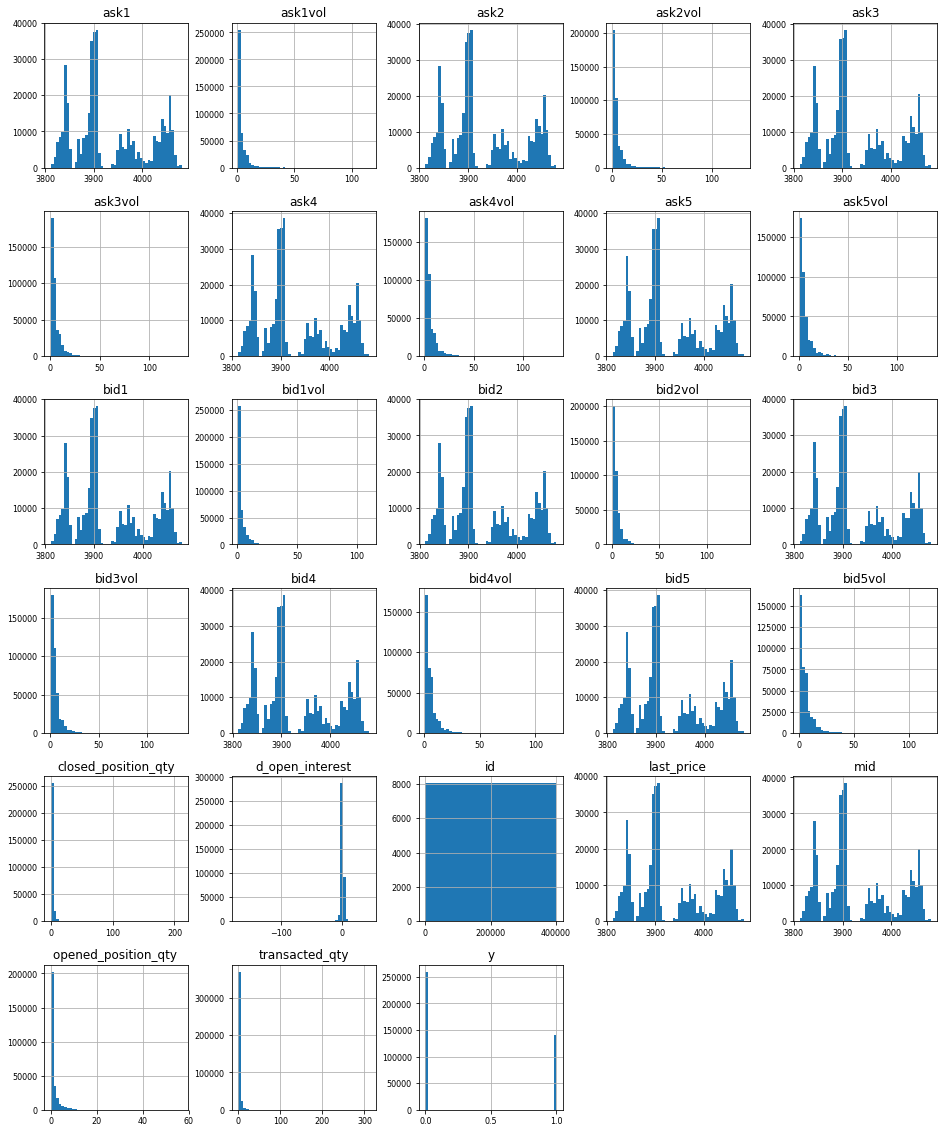

In [14]:
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
dt_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [29]:
dt_num_corr = dt_num.corr()['y'][1:-1]
dt_num_corr


# we see that strongest correlation is w/  bid1vol, makes sense, strongest negative w/  ask1vol 
# so like the mro

last_price              0.011557
mid                     0.011194
opened_position_qty     0.033349
closed_position_qty     0.046777
transacted_qty          0.057254
d_open_interest        -0.017158
bid1                    0.011154
bid2                    0.011240
bid3                    0.011246
bid4                    0.011246
bid5                    0.011243
ask1                    0.011233
ask2                    0.011359
ask3                    0.011374
ask4                    0.011383
ask5                    0.011393
bid1vol                 0.090275
bid2vol                 0.030833
bid3vol                 0.008520
bid4vol                 0.008019
bid5vol                 0.003634
ask1vol                -0.129292
ask2vol                -0.027712
ask3vol                -0.009802
ask4vol                -0.006100
ask5vol                -0.010194
Name: y, dtype: float64

In [30]:
golden_features_list = dt_num_corr[abs(dt_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with SalePrice:
Series([], Name: y, dtype: float64)


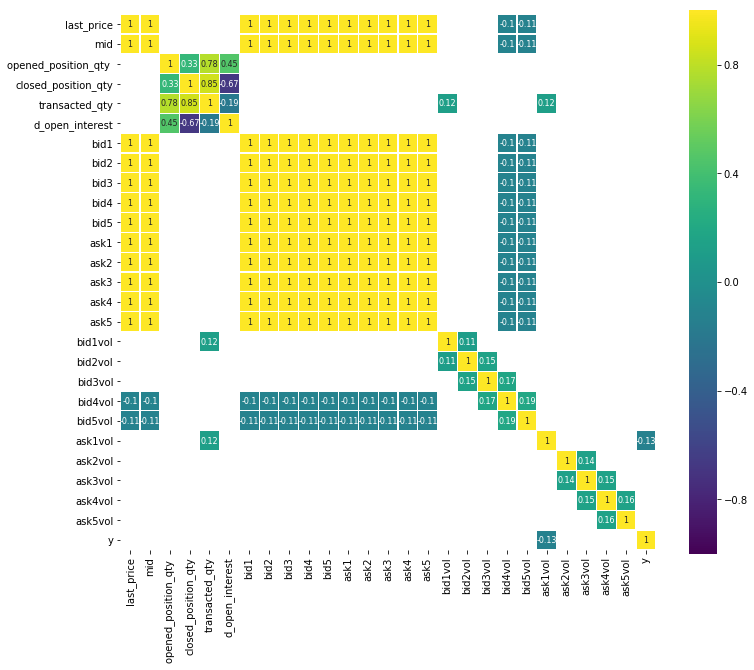

In [34]:
corr = dt_num.drop('id', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [5]:
dt

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,...,1,6,14,6,6,1,1,10,2,1
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,...,6,11,1,6,1,4,4,1,13,0
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,...,1,4,21,12,1,16,10,4,9,0
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,...,13,12,2,4,2,7,1,2,11,1
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,...,12,2,2,4,1,3,1,11,15,1
5,5,3843.6,3844.2,12.0,17.0,29.0,-5,3843.8,3843.4,3843.2,...,6,1,2,17,1,12,15,10,3,0
6,6,3843.6,3844.3,2.0,37.0,39.0,-34,3843.8,3843.4,3843.2,...,7,1,1,17,11,15,10,3,9,0
7,7,3844.8,3843.5,4.0,24.0,28.0,-20,3843.2,3843.0,3842.8,...,2,17,1,12,2,12,7,16,10,0
8,8,3843.4,3843.7,2.0,30.0,32.0,-28,3843.4,3843.2,3843.0,...,1,3,17,1,1,2,6,8,18,1
9,9,3844.0,3843.4,3.0,12.0,15.0,-9,3843.0,3842.8,3842.6,...,17,3,12,2,7,1,2,7,8,1
